# Импорт всего необходимого

In [1]:

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn import preprocessing
import random
le = preprocessing.LabelEncoder()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from datetime import datetime
%matplotlib inline     

<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()


#Проверка таблицы

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')
import os
#os.chdir("/content/drive/My Drive/Colab Notebooks")
df = pd.read_csv("../data/genres_v2.csv")

<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
C:\Users\Stapler\AppData\Local\Temp\ipykernel_12912\4040520011.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/genres_v2.csv")


In [3]:
#df = pd.read_csv("genres_v2.csv")
df.head(5)      

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

# Стоит отбросить ненужные столбцы

In [5]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [6]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

# Совершенно не нужны - id, uri, track_href, alaysis_url, song_name, Unnamed: 0, title

In [7]:
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], axis=1)
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


# Также стоит дропнуть дупликаты

In [8]:
print("duplicates: ", df[df.duplicated()].shape)
df = df.drop_duplicates()
df = df.dropna()

#remove_n = 20000
#drop_indices = np.random.choice(df.index, remove_n, replace=False)
#df = df.drop(drop_indices)


df.count()


duplicates:  (4180, 14)


danceability        38125
energy              38125
key                 38125
loudness            38125
mode                38125
speechiness         38125
acousticness        38125
instrumentalness    38125
liveness            38125
valence             38125
tempo               38125
duration_ms         38125
time_signature      38125
genre               38125
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38125 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      38125 non-null  float64
 1   energy            38125 non-null  float64
 2   key               38125 non-null  int64  
 3   loudness          38125 non-null  float64
 4   mode              38125 non-null  int64  
 5   speechiness       38125 non-null  float64
 6   acousticness      38125 non-null  float64
 7   instrumentalness  38125 non-null  float64
 8   liveness          38125 non-null  float64
 9   valence           38125 non-null  float64
 10  tempo             38125 non-null  float64
 11  duration_ms       38125 non-null  int64  
 12  time_signature    38125 non-null  int64  
 13  genre             38125 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 4.4+ MB


<AxesSubplot: title={'center': 'Genres'}>

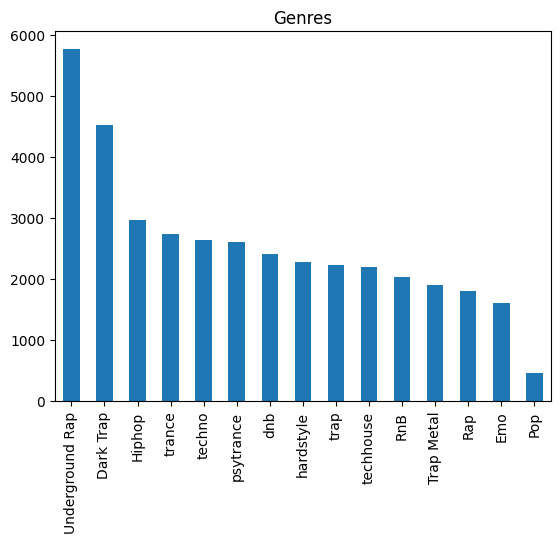

In [10]:
df['genre'].value_counts().plot(kind="bar", title="Genres")

In [11]:
c = df.copy()
c['genre']  = le.fit_transform(c['genre'])
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38125 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      38125 non-null  float64
 1   energy            38125 non-null  float64
 2   key               38125 non-null  int64  
 3   loudness          38125 non-null  float64
 4   mode              38125 non-null  int64  
 5   speechiness       38125 non-null  float64
 6   acousticness      38125 non-null  float64
 7   instrumentalness  38125 non-null  float64
 8   liveness          38125 non-null  float64
 9   valence           38125 non-null  float64
 10  tempo             38125 non-null  float64
 11  duration_ms       38125 non-null  int64  
 12  time_signature    38125 non-null  int64  
 13  genre             38125 non-null  int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 4.2 MB


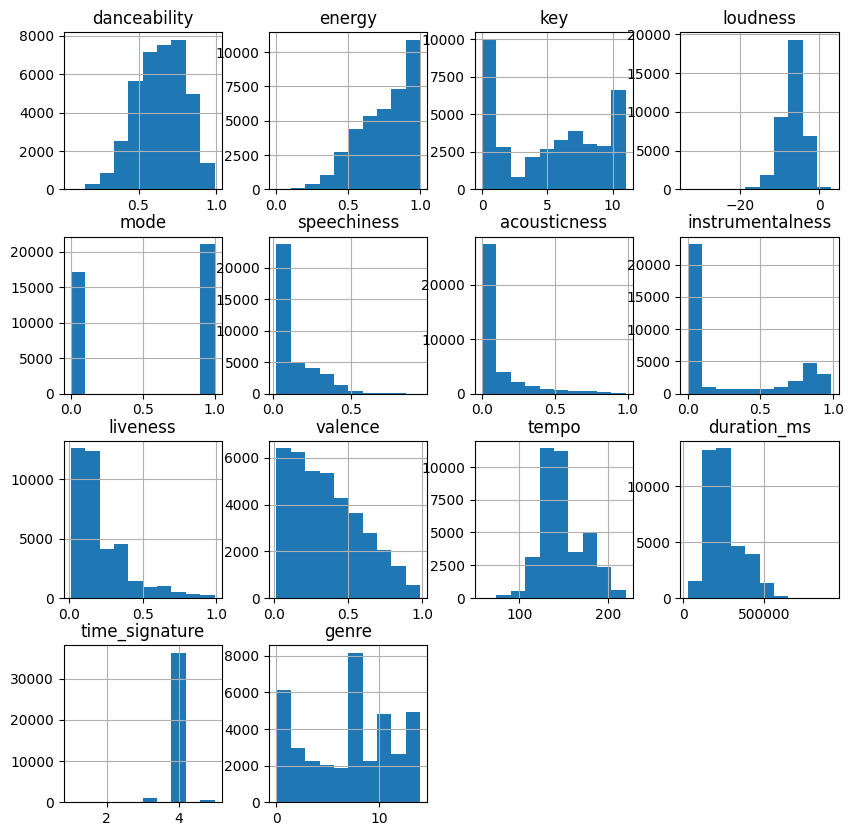

In [12]:
histograms = c.hist(figsize=(10,10))
plt.show()

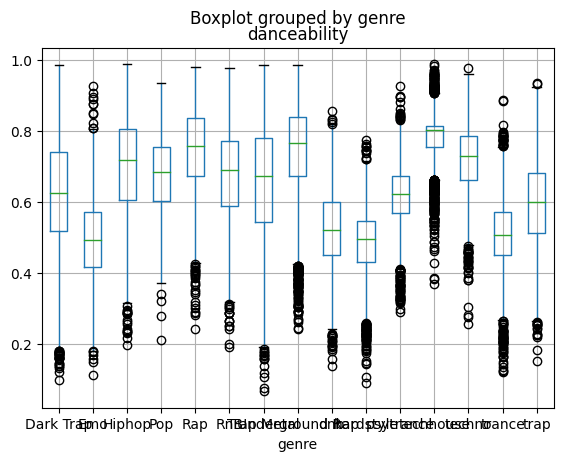

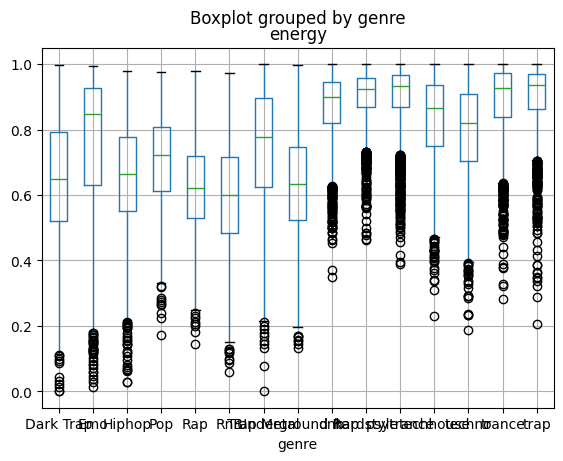

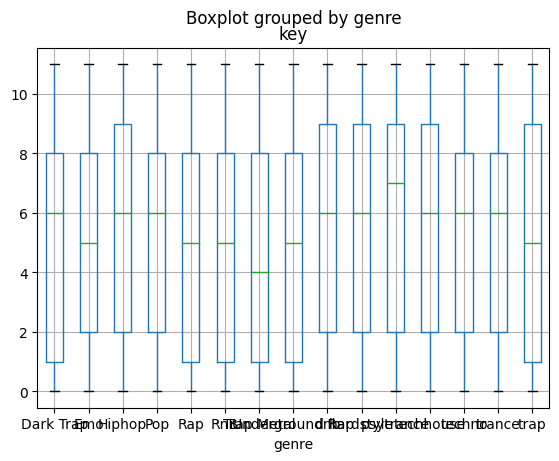

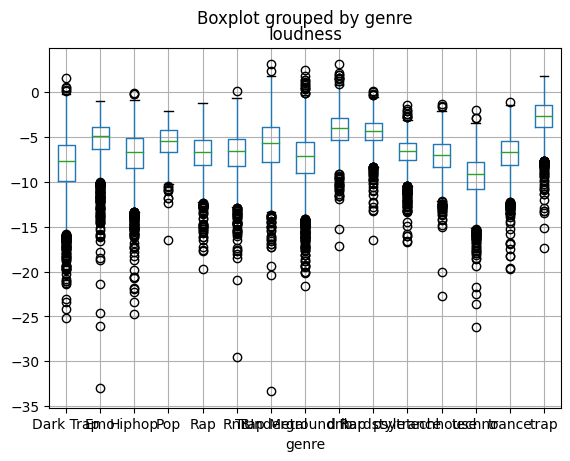

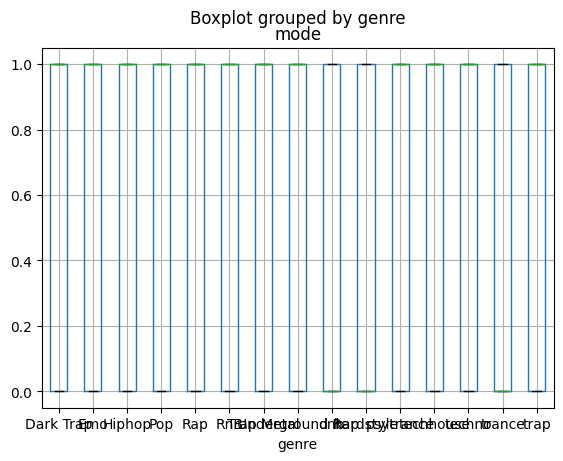

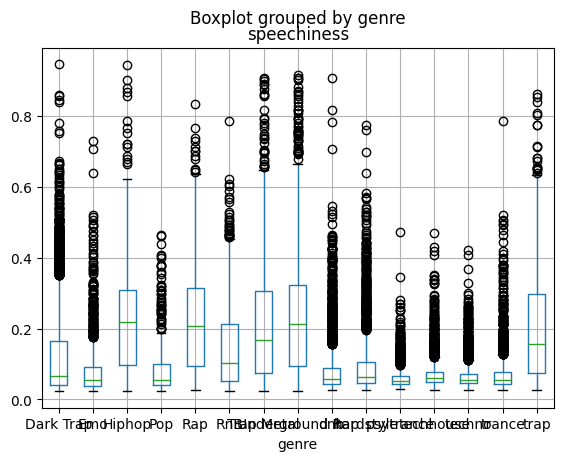

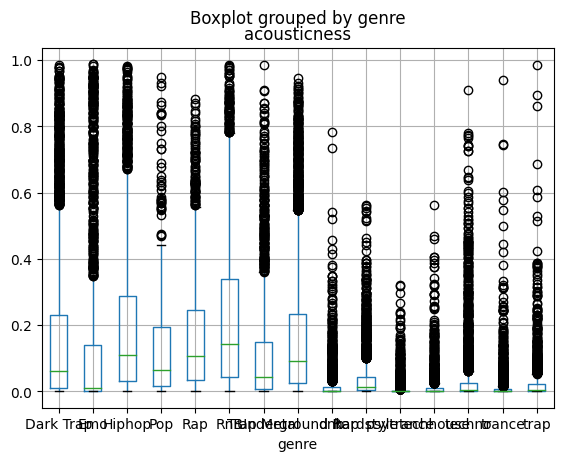

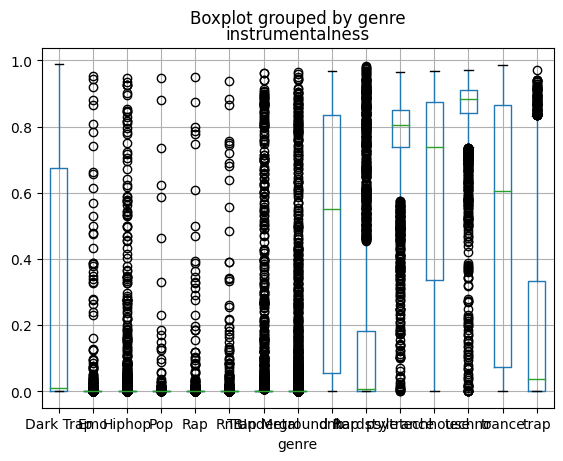

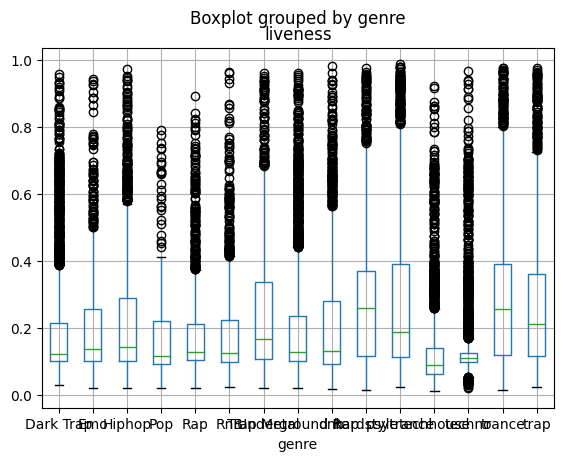

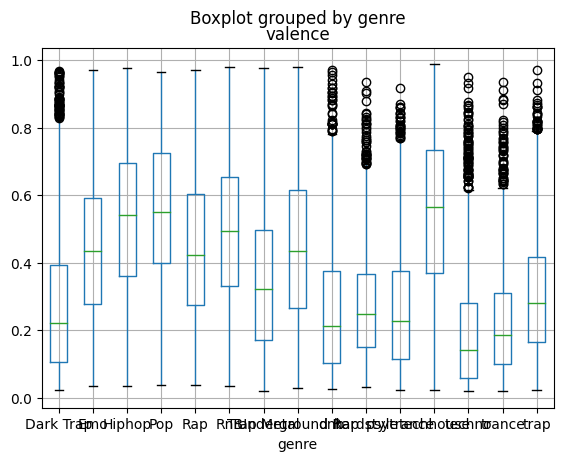

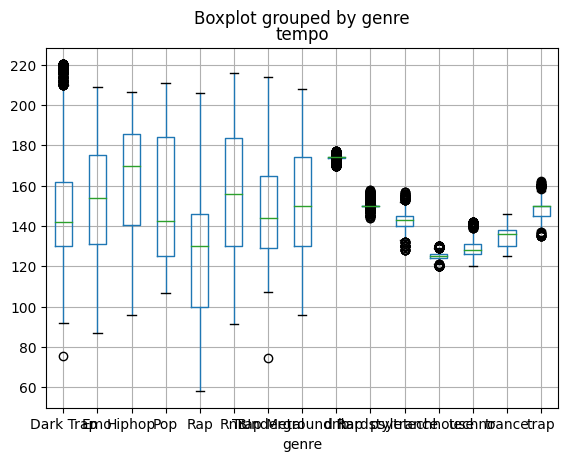

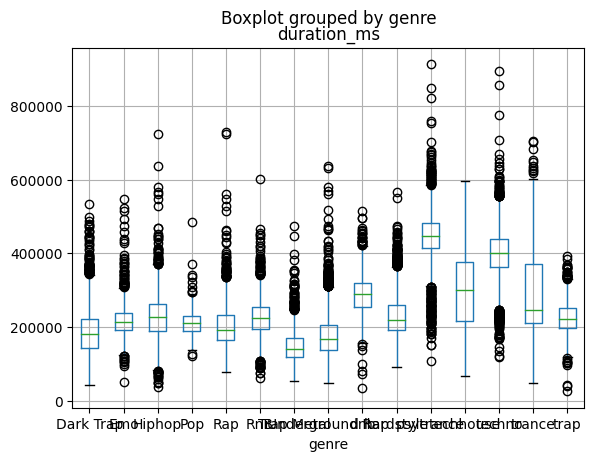

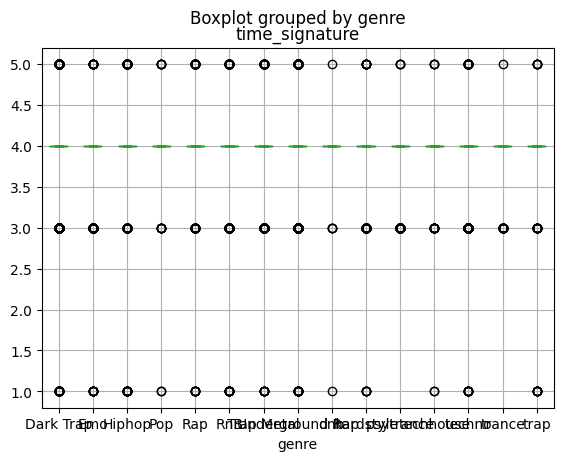

In [13]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
for col in df.select_dtypes(include=np.number).columns.tolist():
  df.boxplot(by ='genre', column =[col], grid = True)

In [32]:
#pd.plotting.scatter_matrix(df, figsize = [20,20]) #- если вдруг захочется посмотреть на матрицы рассеивания

In [15]:
X = df.copy()
X['genre']  = le.fit_transform(X['genre'])
y = X.pop('genre') 
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,0.502,0.991,5,-4.333,0,0.2400,0.005540,0.000198,0.4700,0.0797,150.029,200000,4
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4


In [16]:
sm=SMOTE()
X_std = preprocessing.StandardScaler().fit_transform(X)
X,y=sm.fit_resample(X_std,y)

<AxesSubplot: title={'center': 'Genres'}>

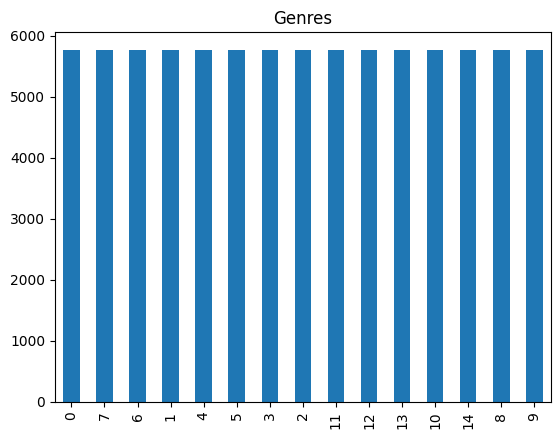

In [17]:
y.value_counts().plot(kind="bar", title="Genres")

<AxesSubplot: >

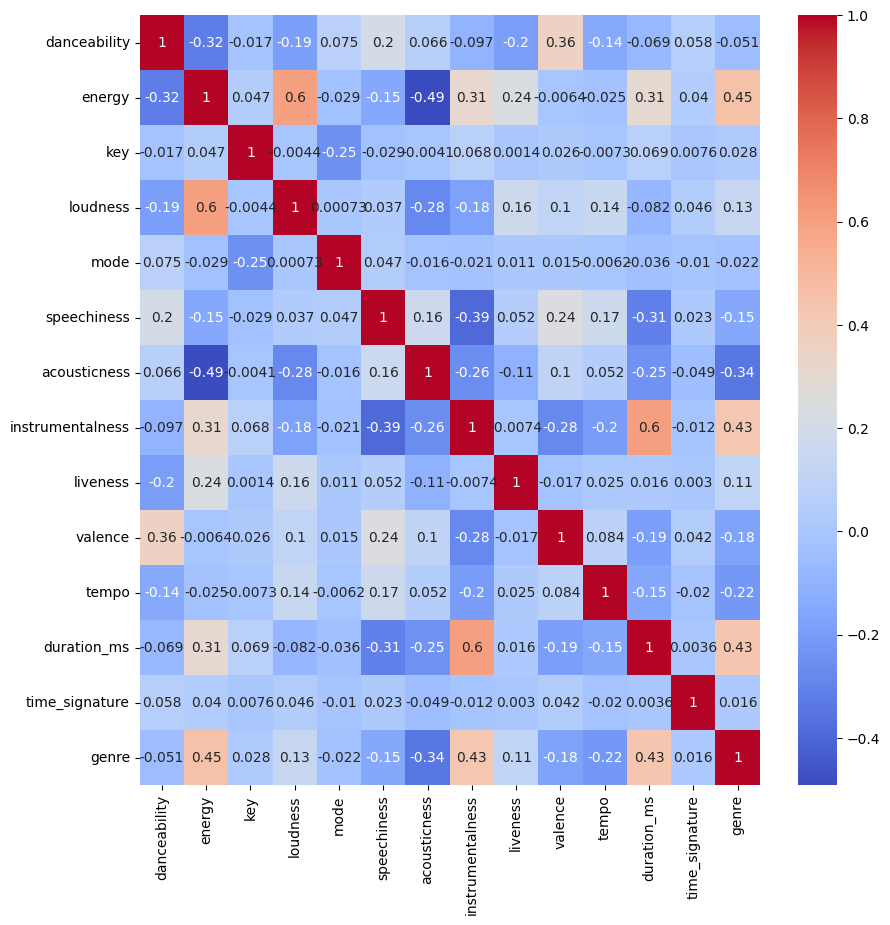

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(c.corr(), annot = True, cmap= 'coolwarm')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 1, shuffle = True)

Создание моделей

In [20]:
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
svm = SVC(kernel = 'linear', probability = True)
nb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth = None, splitter = 'best')
rfc = RandomForestClassifier(max_depth = None, max_features = 'sqrt', n_estimators = 50)

Логическая регрессия с кросс-валидационными фолдами

In [21]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(lr, X, y, cv=cv)

array([0.57608779, 0.58109357, 0.58013092, 0.57712745, 0.57724297])

Далее - все модели, их оценка, матрицы ошибок, ROC-кривые

LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

           0       0.45      0.32      0.38      1143
           1       0.45      0.54      0.49      1131
           2       0.45      0.41      0.43      1160
           3       0.42      0.47      0.44      1186
           4       0.46      0.47      0.47      1258
           5       0.41      0.30      0.35      1219
           6       0.51      0.54      0.52      1175
           7       0.31      0.28      0.29      1156
           8       0.77      0.83      0.80      1124
           9       0.61      0.64      0.62      1116
          10       0.82      0.87      0.84      1111
          11       0.73      0.80      0.76      1116
          12       0.81      0.82      0.82      1132
          13       0.67      0.71      0.69      1135
          14       0.70      0.71      0.70      1151

    accuracy                           0.58     17313
   macro avg       0.57      0.58      0.57   

C:\Users\Stapler\pyenv\venvironment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.54      0.43      0.48      1143
           1       0.88      0.93      0.90      1131
           2       0.64      0.65      0.64      1160
           3       0.86      0.98      0.91      1186
           4       0.74      0.82      0.78      1258
           5       0.75      0.81      0.78      1219
           6       0.69      0.77      0.73      1175
           7       0.29      0.15      0.20      1156
           8       0.96      0.98      0.97      1124
           9       0.88      0.92      0.90      1116
          10       0.92      0.95      0.94      1111
          11       0.90      0.95      0.93      1116
          12       0.92      0.92      0.92      1132
          13       0.88      0.89      0.88      1135
          14       0.92      0.92      0.92      1151

    accuracy                           0.80     17313
   macro avg       0.78      0.80      0.79     17313
weighted avg       0.78   

C:\Users\Stapler\pyenv\venvironment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SVC(kernel='linear', probability=True)
              precision    recall  f1-score   support

           0       0.45      0.37      0.41      1143
           1       0.50      0.69      0.58      1131
           2       0.44      0.40      0.42      1160
           3       0.47      0.52      0.49      1186
           4       0.48      0.52      0.50      1258
           5       0.44      0.32      0.37      1219
           6       0.51      0.59      0.55      1175
           7       0.32      0.30      0.31      1156
           8       0.88      0.90      0.89      1124
           9       0.79      0.72      0.76      1116
          10       0.91      0.92      0.92      1111
          11       0.82      0.86      0.84      1116
          12       0.88      0.86      0.87      1132
          13       0.79      0.83      0.81      1135
          14       0.85      0.71      0.77      1151

    accuracy                           0.63     17313
   macro avg       0.64      0.63      0.

C:\Users\Stapler\pyenv\venvironment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


BernoulliNB()
              precision    recall  f1-score   support

           0       0.30      0.32      0.31      1143
           1       0.43      0.43      0.43      1131
           2       0.36      0.38      0.37      1160
           3       0.36      0.40      0.38      1186
           4       0.34      0.45      0.39      1258
           5       0.34      0.17      0.23      1219
           6       0.30      0.19      0.23      1175
           7       0.29      0.17      0.22      1156
           8       0.62      0.71      0.66      1124
           9       0.47      0.64      0.54      1116
          10       0.55      0.68      0.61      1111
          11       0.63      0.67      0.65      1116
          12       0.68      0.68      0.68      1132
          13       0.61      0.56      0.58      1135
          14       0.39      0.42      0.41      1151

    accuracy                           0.45     17313
   macro avg       0.45      0.46      0.45     17313
weighted avg

C:\Users\Stapler\pyenv\venvironment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.37      0.40      0.38      1143
           1       0.75      0.78      0.77      1131
           2       0.45      0.47      0.46      1160
           3       0.77      0.80      0.78      1186
           4       0.63      0.60      0.62      1258
           5       0.57      0.55      0.56      1219
           6       0.54      0.53      0.54      1175
           7       0.22      0.19      0.20      1156
           8       0.96      0.95      0.96      1124
           9       0.85      0.86      0.86      1116
          10       0.92      0.93      0.93      1111
          11       0.89      0.88      0.88      1116
          12       0.86      0.86      0.86      1132
          13       0.84      0.86      0.85      1135
          14       0.82      0.80      0.81      1151

    accuracy                           0.69     17313
   macro avg       0.70      0.70      0.70     17313
weighted avg       0.69   

C:\Users\Stapler\pyenv\venvironment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.58      0.48      0.53      1143
           1       0.88      0.89      0.89      1131
           2       0.62      0.63      0.63      1160
           3       0.87      0.94      0.91      1186
           4       0.73      0.75      0.74      1258
           5       0.75      0.75      0.75      1219
           6       0.66      0.72      0.69      1175
           7       0.33      0.28      0.30      1156
           8       0.98      0.99      0.98      1124
           9       0.93      0.95      0.94      1116
          10       0.95      0.96      0.96      1111
          11       0.92      0.94      0.93      1116
          12       0.92      0.91      0.92      1132
          13       0.89      0.93      0.91      1135
          14       0.91      0.91      0.91      1151

    accuracy                           0.80     17313
   macro avg       0.80      0.80      0.80     17313
weighted avg       0.79   

C:\Users\Stapler\pyenv\venvironment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


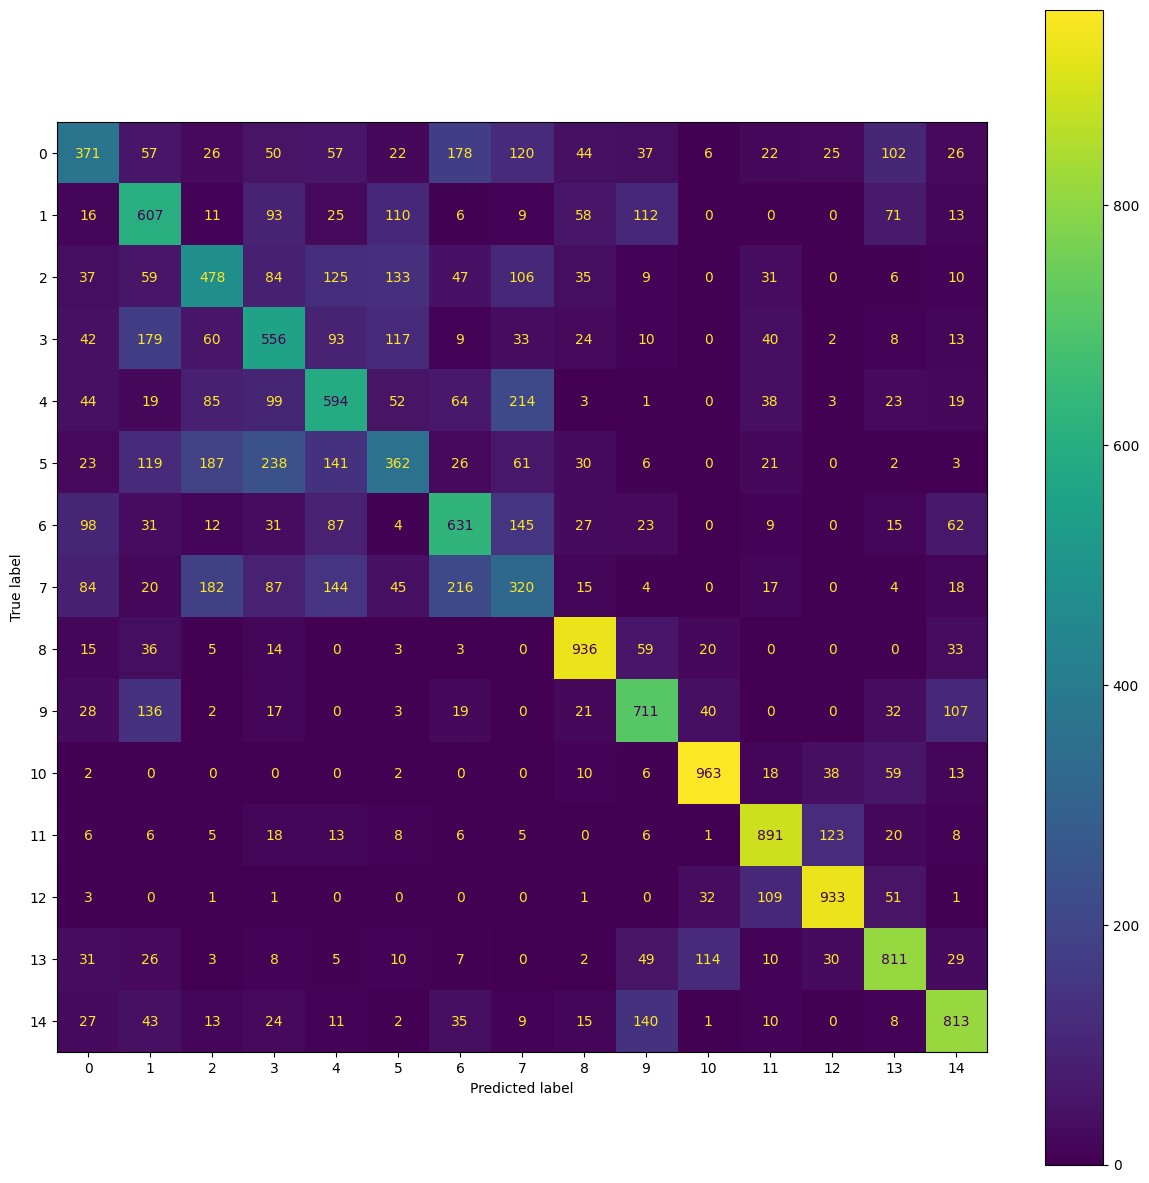

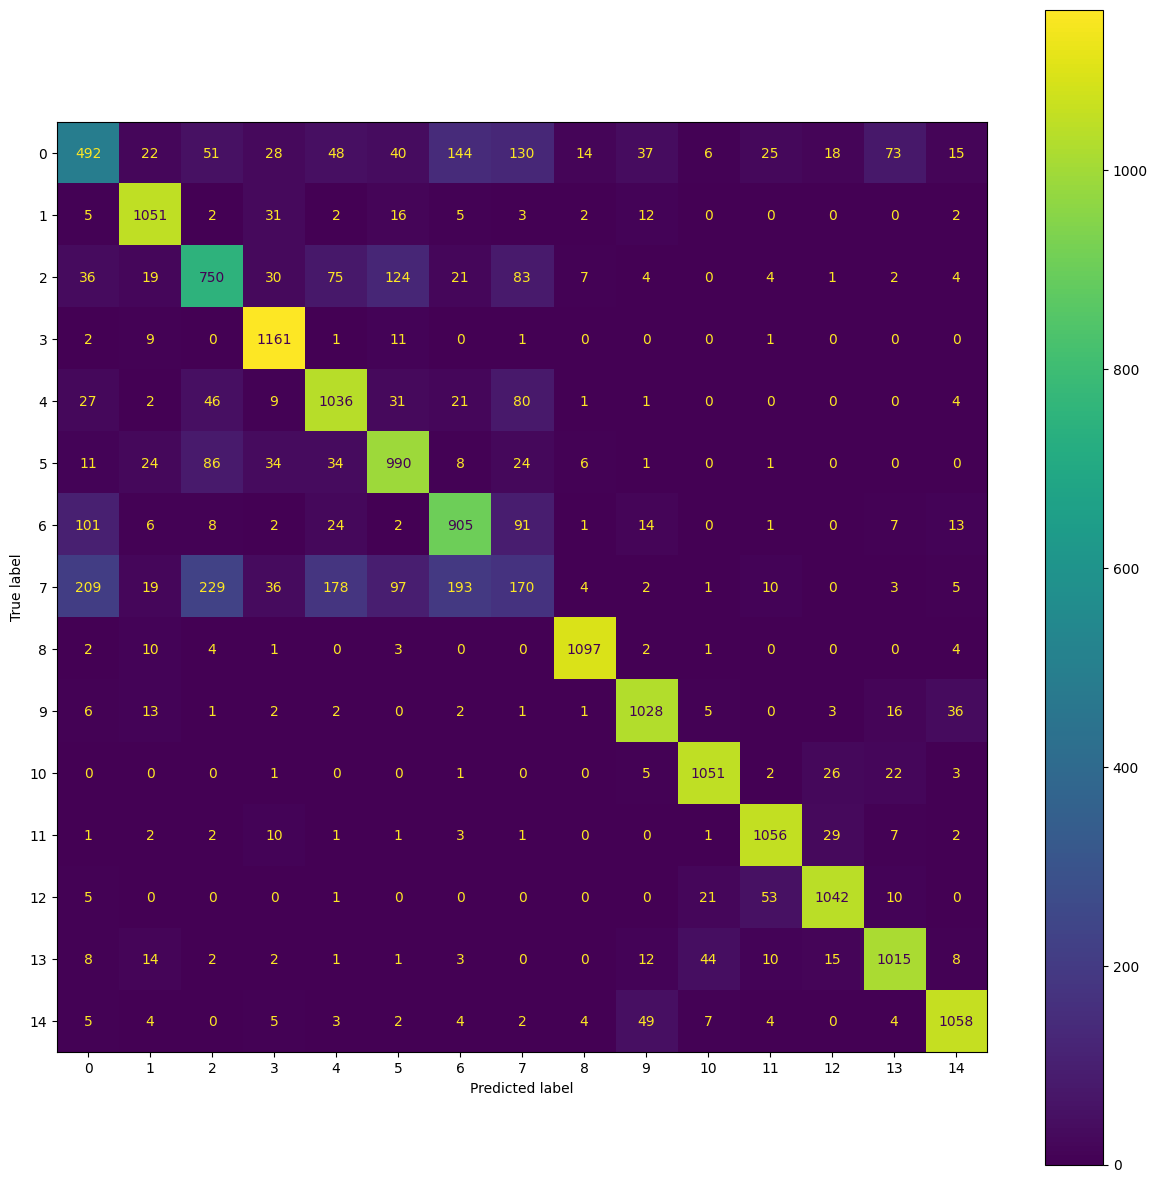

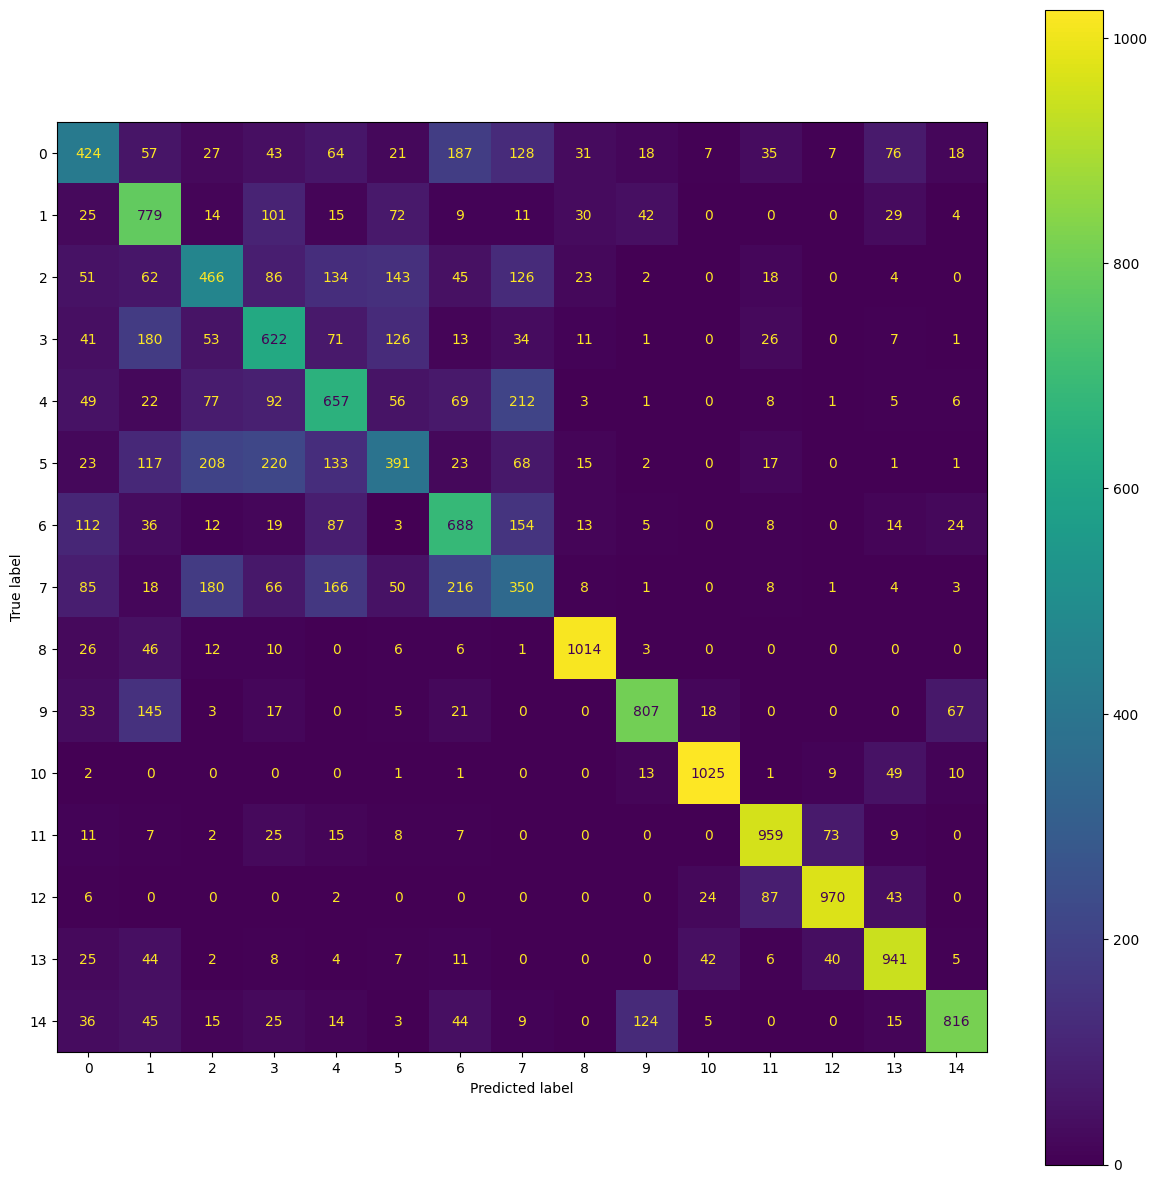

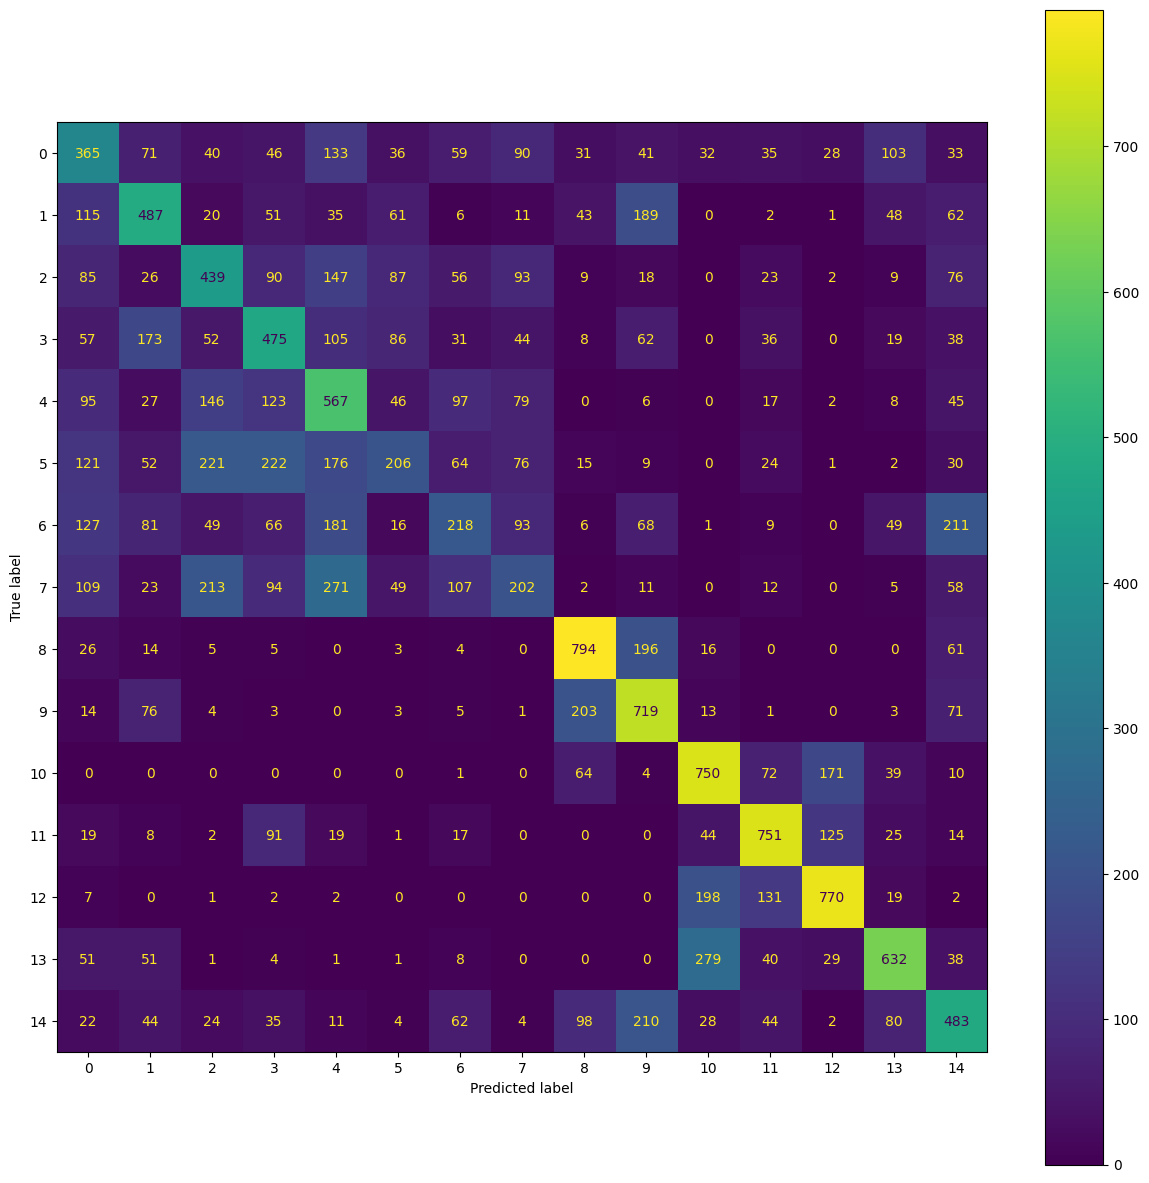

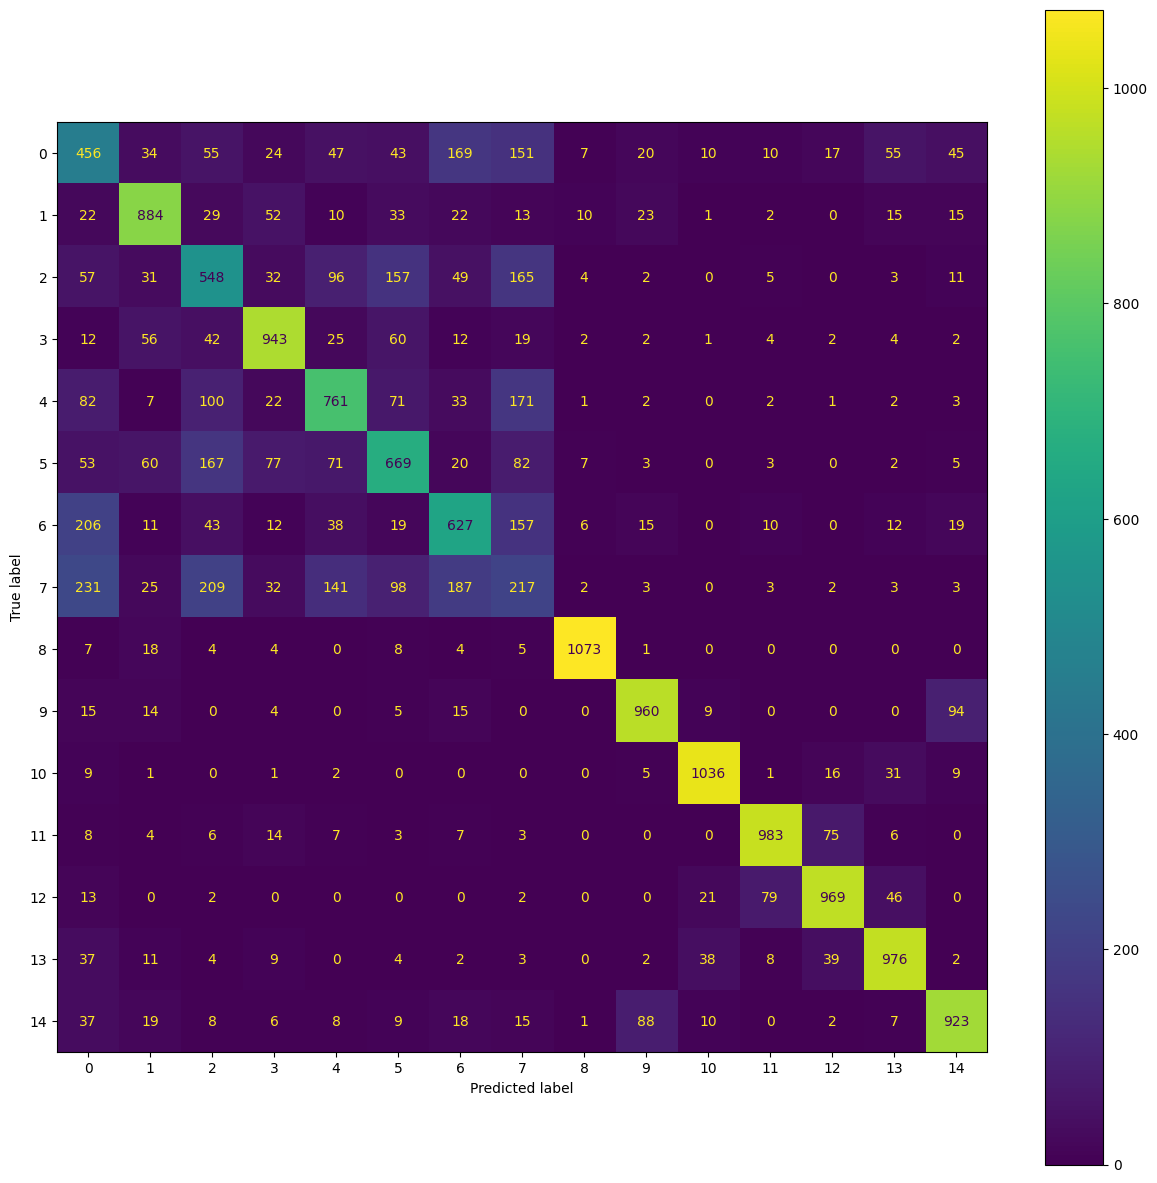

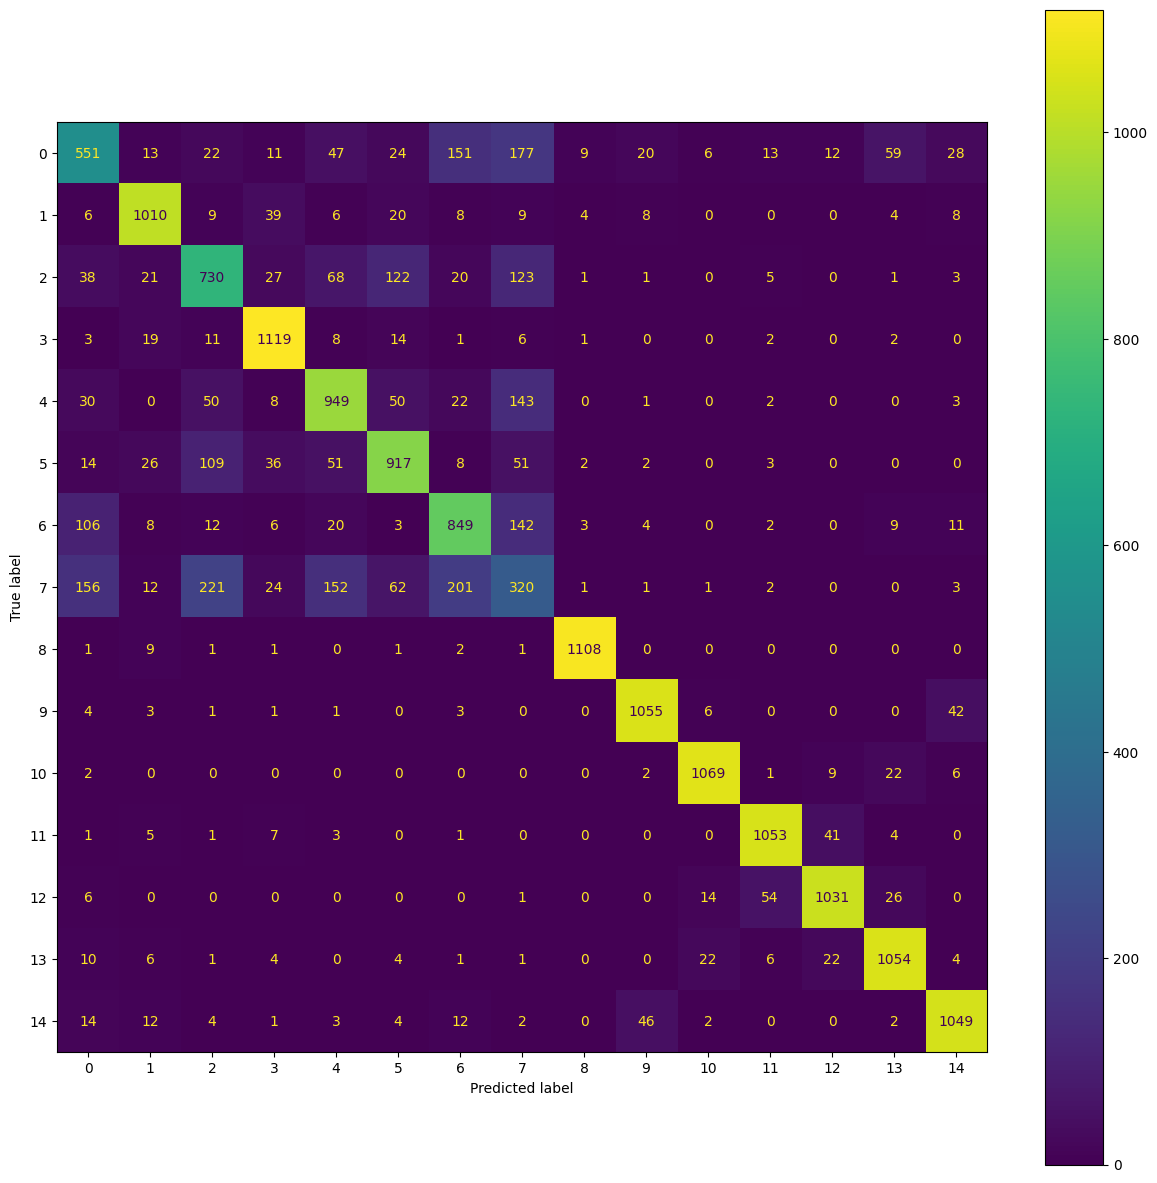

In [22]:
models = [lr, knn, svm, nb, dtc, rfc]

for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    #cf_matrix = confusion_matrix(y_pred, y_test)
    fig, ax = plt.subplots(figsize=(15, 15))
    metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax)
    

ROC-кривые
Обычно чем больше площадь под кривой - тем лучше, также хорошо, когда кривая резко поднимается, т.к. в идеале необходимо максимизировать true positive rate и минимизировать false positive rate

LogisticRegression(max_iter=1000)


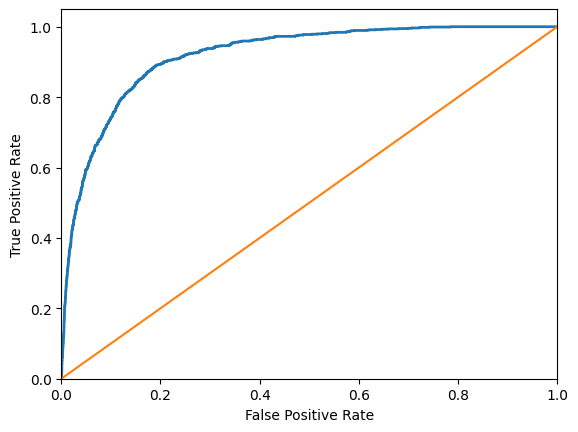

KNeighborsClassifier(weights='distance')


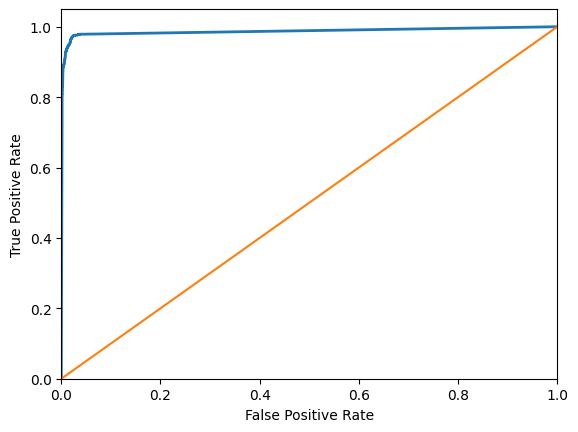

SVC(kernel='linear', probability=True)


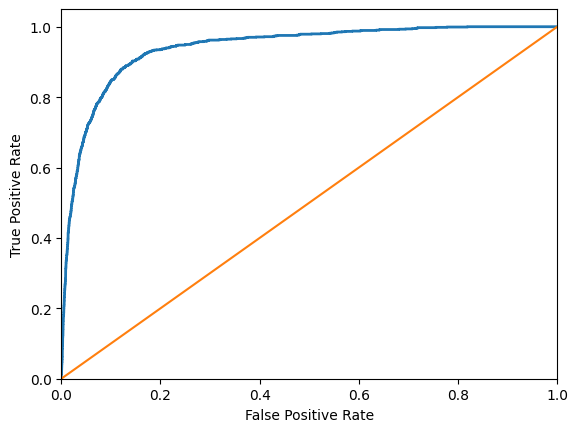

BernoulliNB()


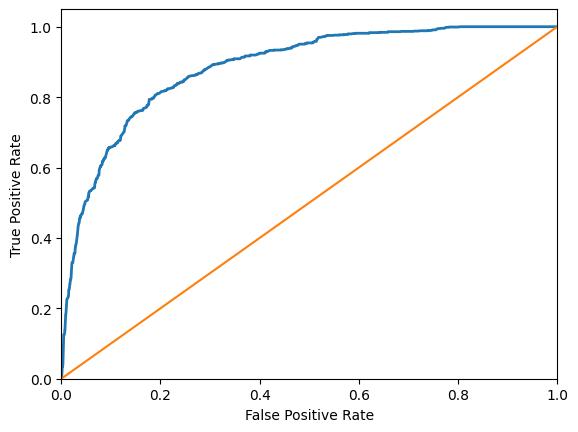

DecisionTreeClassifier()


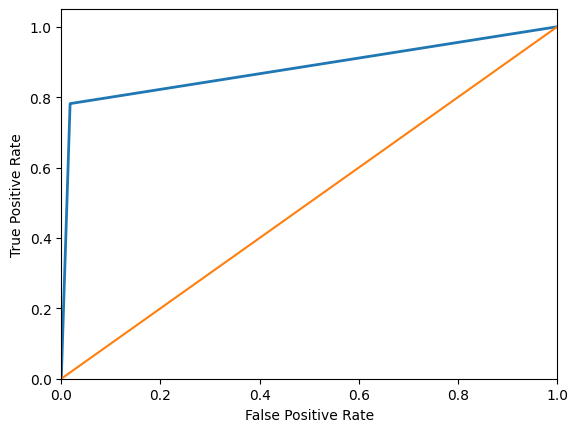

RandomForestClassifier(n_estimators=50)


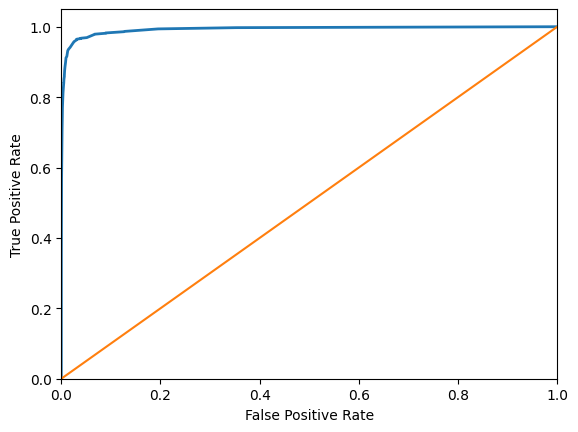

In [23]:
for model in models:
  print(model)
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
  plt.plot(fpr, tpr, lw=2, label='ROC')
  plt.plot([0, 1], [0, 1])
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

Визуализация дерева решений

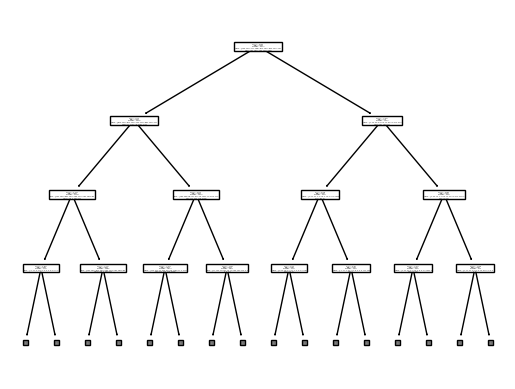

In [24]:
from sklearn import tree
tree.plot_tree(dtc,max_depth = 3);

Feature importance
показывают важность фич. 

10    0.210085
11    0.127395
0     0.095903
7     0.095203
3     0.082661
1     0.076757
5     0.070407
9     0.070340
6     0.067957
8     0.051630
2     0.036823
4     0.010751
12    0.004087
dtype: float64

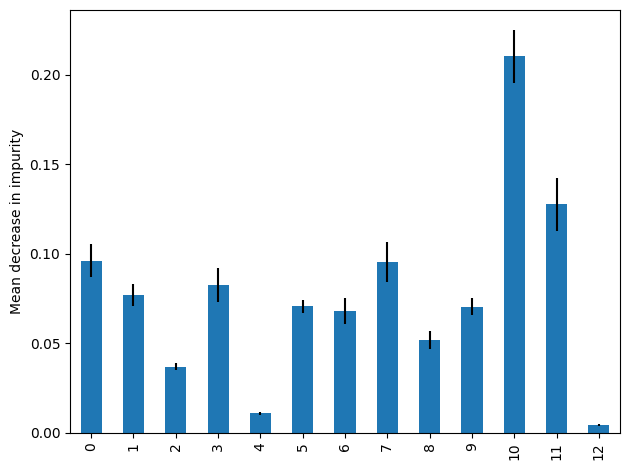

In [25]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

feature_scores = pd.Series(rfc.feature_importances_).sort_values(ascending=False)

feature_scores

Далее - GridSearch

In [26]:
models = [lr, knn, nb, dtc, rfc] 

params = { 
    'max_iter' : [1000, 3000, 5000],
}

grid_search = GridSearchCV(estimator = lr, param_grid = params, cv = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_iter': 1000}
0.580430890082597


In [27]:
params = { 
    'n_neighbors' : [5, 10, 15],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(estimator = knn, param_grid = params, cv = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'weights': 'distance'}
0.7463466759082771


In [28]:
params = { 
    'splitter': ["best", "random"],
    'max_depth' : [5, 10, 50, None],
}

grid_search = GridSearchCV(estimator = dtc, param_grid = params, cv = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 50, 'splitter': 'best'}
0.6570062958470513


In [29]:
params = { 
    'n_estimators': [50, 100],
    'max_depth' : [10, 50, None],
    'max_features' : ["sqrt", "log2"]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = params, cv = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}
0.775631028706752


XGBoost

В основе XGBoost лежит алгоритм градиентного бустинга деревьев решений. Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений. Обучение ансамбля проводится последовательно в отличие, например от бэггинга. На каждой итерации вычисляются отклонения предсказаний уже обученного ансамбля на обучающей выборке. Следующая модель, которая будет добавлена в ансамбль будет предсказывать эти отклонения. Таким образом, добавив предсказания нового дерева к предсказаниям обученного ансамбля мы можем уменьшить среднее отклонение модели, которое является таргетом оптимизационной задачи. Новые деревья добавляются в ансамбль до тех пор, пока ошибка уменьшается, либо пока не выполняется одно из правил "ранней остановки".

In [30]:
params_boost = {
        'min_child_weight': [0, 1, 5, 10],
        'gamma': [0.5, 1, 5],
        'subsample': [0.5,  1.0],
        'max_depth': [6, 10, 100],
        'n_estimators': [50, 100]
        }

xgbClassifier = XGBClassifier(objective='binary:logistic')

random_search = RandomizedSearchCV(xgbClassifier, param_distributions=params_boost, n_iter = 5, scoring='accuracy', 
                                   n_jobs=-1, cv=2, verbose=3, random_state=215)

random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)
xgb_bp = random_search.best_params_

Fitting 2 folds for each of 5 candidates, totalling 10 fits


<frozen importlib._bootstrap>:1049: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()


{'subsample': 0.5, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 100, 'gamma': 0.5}
0.7633136949113384
